# Azure Sentiment Analysis on Movie Reviews

## Imports

In [34]:
import requests
import os
import pandas as pd
import seaborn as sns
import matplotlib as plt

## API Keys for Azure Cognitive Services
(API Key was exported) 

```export AZURE_API_KEY="xxfxxxxxxx"```

In [2]:
subscription_key=os.environ.get("AZURE_API_KEY")

In [20]:
text_analytics_base_url =\
"https://eastus.api.cognitive.microsoft.com/text/analytics/v2.0/"

## Analyze Sentiment From Cornell Computer Science Data Set
http://www.cs.cornell.edu/people/pabo/movie-review-data/

## Format Data Set For API

In [21]:
documents = {"documents":[]}
path = "../data/review_polarity/txt_sentoken/neg/cv000_29416.txt"
doc1 = open(path, "r")
output = doc1.readlines()
count = 0
for line in output:
    count +=1
    record = {"id": count, "language": "en", "text": line}
    documents["documents"].append(record)

#print it out
documents


{'documents': [{'id': 1,
   'language': 'en',
   'text': 'plot : two teen couples go to a church party , drink and then drive . \n'},
  {'id': 2, 'language': 'en', 'text': 'they get into an accident . \n'},
  {'id': 3,
   'language': 'en',
   'text': 'one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \n'},
  {'id': 4, 'language': 'en', 'text': "what's the deal ? \n"},
  {'id': 5,
   'language': 'en',
   'text': 'watch the movie and " sorta " find out . . . \n'},
  {'id': 6,
   'language': 'en',
   'text': 'critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \n'},
  {'id': 7,
   'language': 'en',
   'text': "which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these fo

## Sentiment Analysis Scoring API Call

In [22]:
sentiment_api_url = text_analytics_base_url + "sentiment"
headers   = {"Ocp-Apim-Subscription-Key": subscription_key}
response  = requests.post(sentiment_api_url, headers=headers, json=documents)
sentiments = response.json()
sentiments

{'documents': [{'id': '1', 'score': 0.5},
  {'id': '2', 'score': 0.13049307465553284},
  {'id': '3', 'score': 0.09667149186134338},
  {'id': '4', 'score': 0.8442018032073975},
  {'id': '5', 'score': 0.808459997177124},
  {'id': '6', 'score': 0.20456644892692566},
  {'id': '7', 'score': 0.14024576544761658},
  {'id': '8', 'score': 0.17604517936706543},
  {'id': '9', 'score': 0.10334345698356628},
  {'id': '10', 'score': 0.13980722427368164},
  {'id': '11', 'score': 0.7988420724868774},
  {'id': '12', 'score': 0.03757387399673462},
  {'id': '13', 'score': 0.161460280418396},
  {'id': '14', 'score': 0.21826156973838806},
  {'id': '15', 'score': 0.9485616087913513},
  {'id': '16', 'score': 0.15699779987335205},
  {'id': '17', 'score': 0.8121253252029419},
  {'id': '18', 'score': 0.8800938129425049},
  {'id': '19', 'score': 0.22605016827583313},
  {'id': '20', 'score': 0.867438793182373},
  {'id': '21', 'score': 0.23370343446731567},
  {'id': '22', 'score': 0.19247117638587952},
  {'id': '2

In [24]:
df = pd.DataFrame(sentiments['documents'])

In [30]:
df.head()
df.describe()

,score
count,35.000000
mean,0.439081
std,0.316936
min,0.037574
25%,0.159229
50%,0.233703
75%,0.803651
max,0.948562


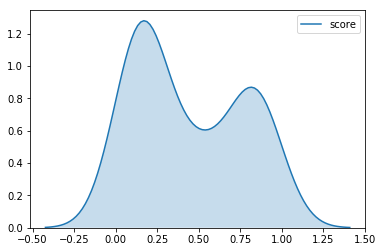

In [37]:
sns.kdeplot(df['score'], shade=True)